# Análise de Valor de Imóveis 

Importanto as bibliotecas necessárias

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import scipy as sp
import pandas as pd
import numpy as np
%matplotlib inline

Algumas bibliotecas não são nativas na instalação mas podemos instala-las com o comando !pip install

In [4]:
!pip install seaborn

Requirement not upgraded as not directly required: seaborn in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn)
Requirement not upgraded as not directly required: scipy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn)
Requirement not upgraded as not directly required: matplotlib in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn)
Requirement not upgraded as not directly required: six>=1.10 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from matplotlib->seaborn)
Requirement not upgraded as not directly required: python-dateutil>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from matplotlib->seaborn)
Requirement not upgraded as not directly

In [5]:
import seaborn as sns

# Regressão Linear

Vamos começar a análise do conjunto de dados de imóveis.

Primeiro, vamos importar e verificar as primeiras linhas

In [7]:
# The code was removed by Watson Studio for sharing.

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV200m
0,1,160000,167.81,1,5,100,100,294,100,1
1,2,67000,128.80,1,6,1,1,1505,100,1
2,3,190000,217.37,1,8,100,1,251,1,100
3,4,110000,180.00,12,4,100,1,245,1,1
4,5,70000,120.00,15,3,100,1,956,100,1


## Valor do Imóvel

Esta é a variável mais importante do dataset.

O objetivo final é encontrar um modelo estatístico capaz de prever
os preços a partir das outras variáveis.

Vamos iniciar avaliando o histograma de preços:

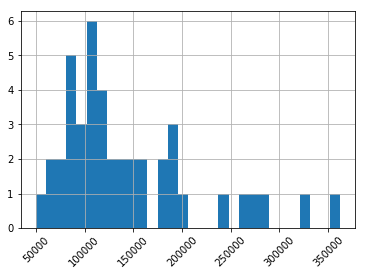

In [8]:
df.Valor.hist(bins=30, xrot=45)

## Valor e Área

Para ter uma noção da correlação das variáveis `Area` e `Valor`, vamos traçar um **gráfico de dispersão**:

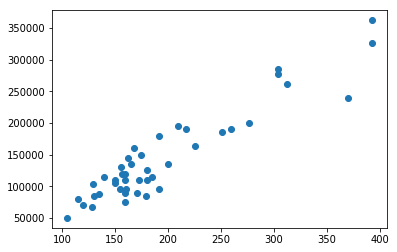

In [9]:
plt.scatter(y='Valor', x='Area', data=df)

Para saber o coeficiente de correlação, vamos usar a **Correlação de Pearson**:

In [10]:
np.corrcoef(df.Valor, df.Area)[0,1]

0.9362024063317006

### Hipóteses

**H0**: correlação (r) = 0

---

**Ha**: correlação (r) <> 0

p - valor = 0,00000000 < 0,05 (alpha) logo **rejeito** H0. Existe correlação entre valor e área.

## Valor e Idade Aparente

Para ter uma noção da correlação das variáveis `Idade Aparente` e `Valor`, vamos traçar um **gráfico de dispersão**:

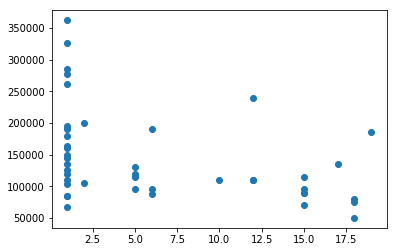

In [11]:
plt.scatter(y='Valor', x='IA', data=df)

Os dados estão em um formato pouco correlacionados visualmente. Vamos analisar se há correlação.
Vamos novamente usar a **Correlação de Pearson**:

In [12]:
np.corrcoef(df.Valor, df.IA)[0,1]

-0.39490090979132908

### Hipóteses

**H0**: correlação (r) = 0

---

**Ha**: correlação (r) <> 0

p - valor = 0,00000000 < 0,05 (alpha) logo **rejeito** H0. Existe correlação entre valor e IA.

## Valor e Andar

Para ter uma noção da correlação das variáveis `Andar` e `Valor`, vamos traçar um **gráfico de dispersão**:

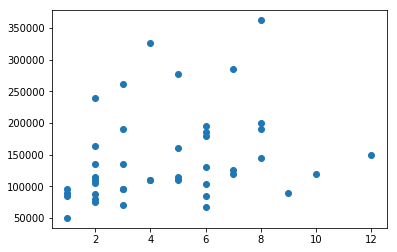

In [13]:
plt.scatter(y='Valor', x='Andar', data=df)

Os dados estão dispersos. Vamos analisar se há correlação.
Vamos novamente usar a **Correlação de Pearson**:

In [14]:
np.corrcoef(df.Valor, df.Andar)[0,1]

0.28100138478965381

### Hipóteses

**H0**: correlação (r) = 0

---

**Ha**: correlação (r) == 0

p - valor = 0,00000000 > 0,05 (alpha) logo **aceito** H0. Não existe correlação entre valor e andar.

## Valor e Suites

Para ter uma noção da correlação das variáveis `Suite` e `Valor`, vamos traçar um **gráfico de dispersão**:

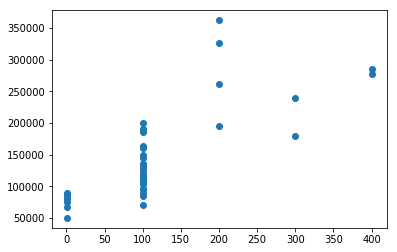

In [15]:
plt.scatter(y='Valor', x='Suites', data=df)

In [16]:
np.corrcoef(df.Valor, df.Suites)[0,1]

0.75834945579843016

### Hipóteses

**H0**: correlação (r) = 0

---

**Ha**: correlação (r) <> 0

p - valor = 0,00000000 < 0,05 (alpha) logo **rejeito** H0. Existe correlação entre valor e área.

## Modelo para Regressão Linear

Vamos começar com o modelo de regressão linear simples, já que temos apenas 1 variável preditora:

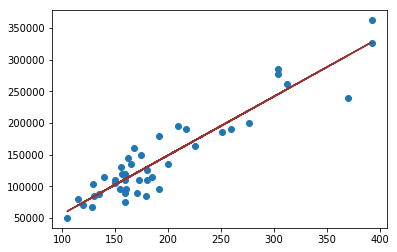

In [17]:
slope, intercept = np.polyfit(df.Area, df.Valor, 1)
abline_values = [slope * i + intercept for i in df.Area]
plt.scatter(x='Area', y='Valor', data=df)
plt.plot(df.Area, abline_values, color='#993333')

Podemos usar uma outra biblioteca, a `pearsonr` do `Scipy`, que já oferece o resultado e o **`valor p`**:

In [18]:
import scipy.stats as stats
correlacao, p = stats.pearsonr(df.Area, df.Valor)
print(correlacao, p)

0.936202406332 3.17027236685e-20


In [19]:
stats.linregress?

Por Claudio Pinheiro www.linkedin.com/in/claudio-pinheiro-cloud

https://github.com/CLAUDIOPINHEIRO/BP-Watson-Studio-LA